In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from collections import defaultdict

from IPython.display import clear_output

from dataset import *
from model import *
from train import *
from model_test import *

In [3]:
model = Seq2Seq(dim_input=12, dim_recurrent=50, dim_output=12)
optimizer = optim.Adam(model.parameters())

In [5]:
losses = []
loss_average_list = []

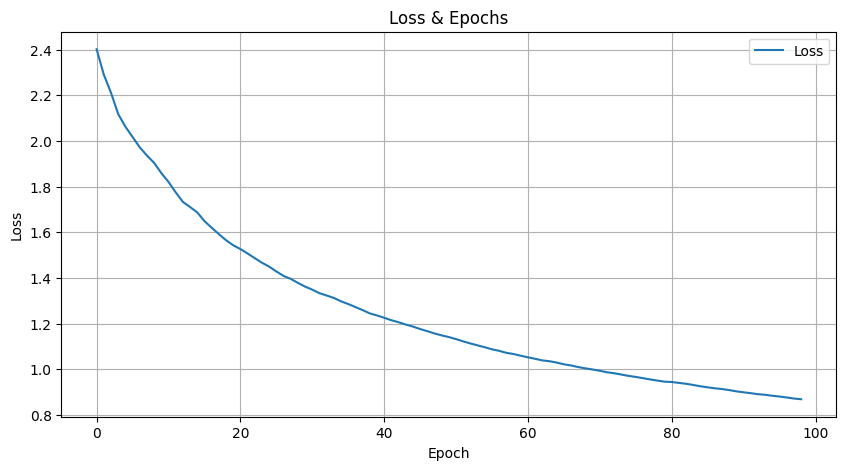

Epoch 9900/10000, Loss: 0.8932
Final loss average: 0.8686776900544135


In [6]:


model_train(epochs=10000, batch_size=100, optimizer=optimizer, model=model, losses=losses, loss_average_list=loss_average_list)

In [7]:
torch.save(model.state_dict(), f'model_state_dict.pth')

In [4]:
model.load_state_dict(torch.load('model_state_dict.pth'))

C:\TEMP\ipykernel_10880\1276111990.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_state_dict.pth'))


<All keys matched successfully>

In [5]:
model_test(model)

0번 test
5000번 test
10000번 test
15000번 test
20000번 test
25000번 test
30000번 test
35000번 test
40000번 test
45000번 test
49999번 test


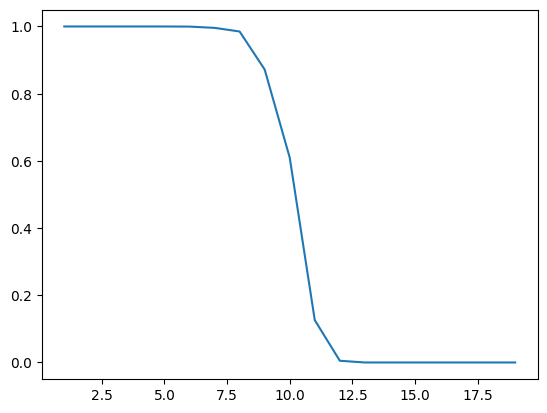

In [6]:
fig, ax = plt.subplots()
x, y = [], []
for i in range(1, 20):
    if length_total[i] > 0:
        x.append(i)
        y.append(length_correct[i] / length_total[i])
ax.plot(x, y);